## Exploratory Data Analysis (EDA)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/hotels.csv")

In [3]:
print(df.shape)

(40552, 10)


In [4]:
print(df.describe())

          travelCode      userCode          days         price         total  \
count   40552.000000  40552.000000  40552.000000  40552.000000  40552.000000   
mean    67911.794461    666.963726      2.499679    214.439554    536.229513   
std     39408.199333    391.136794      1.119326     76.742305    319.331482   
min         0.000000      0.000000      1.000000     60.390000     60.390000   
25%     33696.750000    323.000000      1.000000    165.990000    247.620000   
50%     67831.000000    658.000000      2.000000    242.880000    495.240000   
75%    102211.250000   1013.000000      4.000000    263.410000    742.860000   
max    135942.000000   1339.000000      4.000000    313.020000   1252.080000   

              month           day          year  
count  40552.000000  40552.000000  40552.000000  
mean       6.628625     15.834361   2020.518248  
std        3.606926      8.826290      0.977547  
min        1.000000      1.000000   2019.000000  
25%        3.000000      8.00

In [5]:
# check if anly values missed
print(df.isnull().sum())

travelCode    0
userCode      0
hotel_name    0
place         0
days          0
price         0
total         0
month         0
day           0
year          0
dtype: int64


##Visualize Data

In [36]:
# Q1: numbers of reservation for each places
most = df['place'].value_counts()
print(f'Numbers of reservation for each places: \n{most}')

Numbers of reservation for each places: 
Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Brasilia (DF)          4437
Campo Grande (MS)      4333
Aracaju (SE)           4205
Florianopolis (SC)     3330
Name: place, dtype: int64


<ipython-input-37-4db6cb3f33de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most.index, y=most.values, palette="viridis")


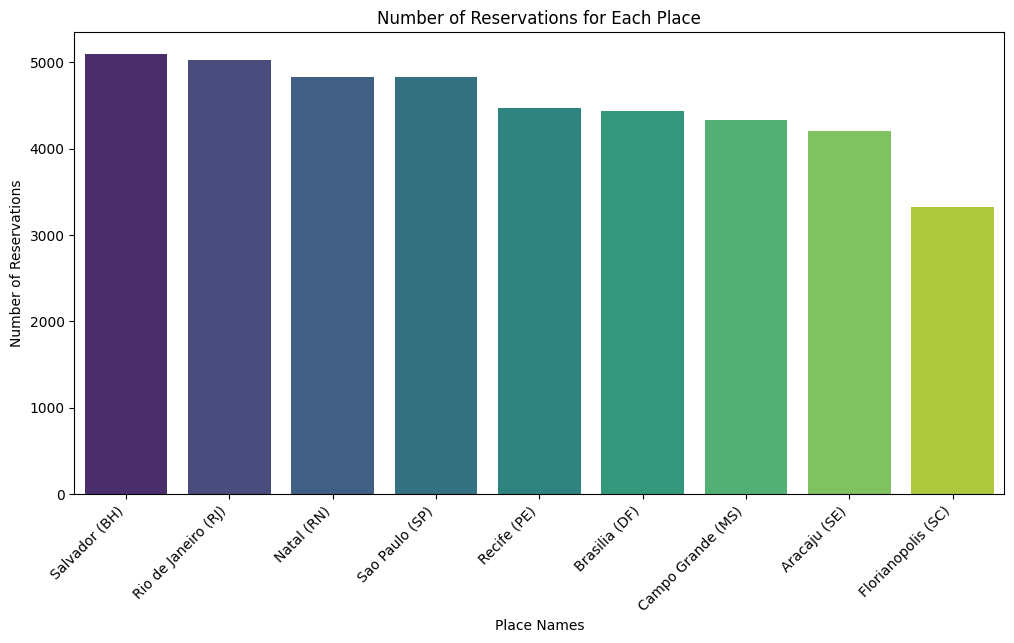

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most.index, y=most.values, palette="viridis")
plt.title('Number of Reservations for Each Place')
plt.xlabel('Place Names')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
# most three reserved hotels
most_hotels_res= df['hotel_name'].value_counts().nlargest(3)
#df['most_hotels_res'] =most_hotels_res
print(f'Most three reserved hotels: \n{most_hotels_res}')

Most three reserved hotels: 
Hotel K     5094
Hotel CB    5029
Hotel BD    4829
Name: hotel_name, dtype: int64


<ipython-input-60-490d38ca2432>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_hotels_res.values, y=most_hotels_res.index, palette="pastel")


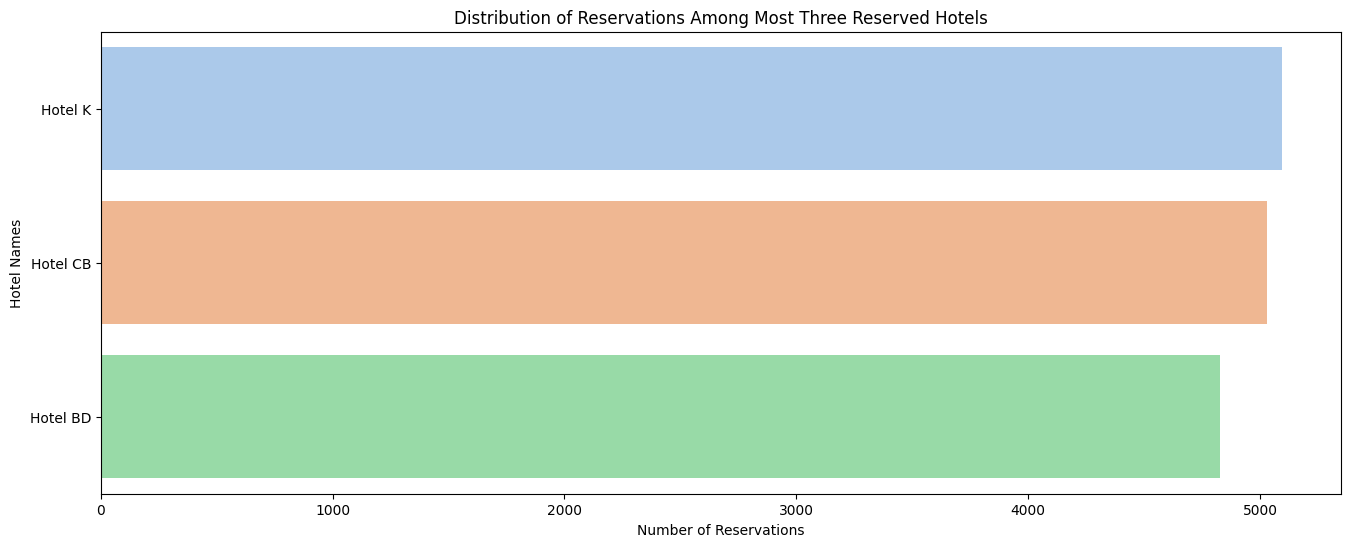

In [60]:
plt.figure(figsize=(16, 6))
sns.barplot(x=most_hotels_res.values, y=most_hotels_res.index, palette="pastel")
plt.title('Distribution of Reservations Among Most Three Reserved Hotels')
plt.xlabel('Number of Reservations')
plt.ylabel('Hotel Names')
plt.show()

In [22]:
# most five wanted places
most_wanted_places = df['place'].value_counts().nlargest(5)
print(f'Most five wanted places: \n{most_wanted_places}')

Most five wanted places: 
Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Name: place, dtype: int64


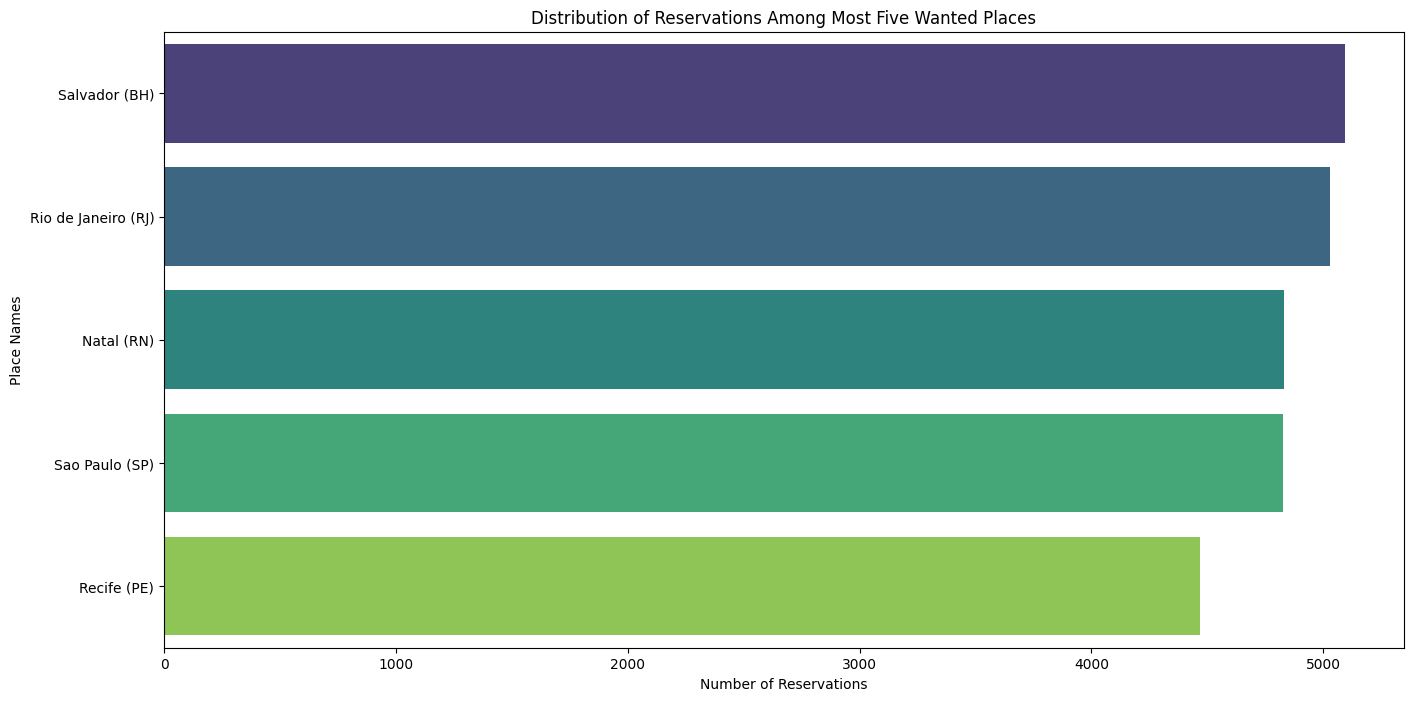

In [59]:
plt.figure(figsize=(16, 8))
sns.barplot(x=most_wanted_places.values, y=most_wanted_places.index, hue=most_wanted_places.index, palette="viridis", dodge=False)
plt.title('Distribution of Reservations Among Most Five Wanted Places')
plt.xlabel('Number of Reservations')
plt.ylabel('Place Names')
plt.legend().set_visible(False)  # Hide the legend
plt.show()

<ipython-input-66-85c189ade255>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel_name', y='place', data=all_reservations, palette="mako")


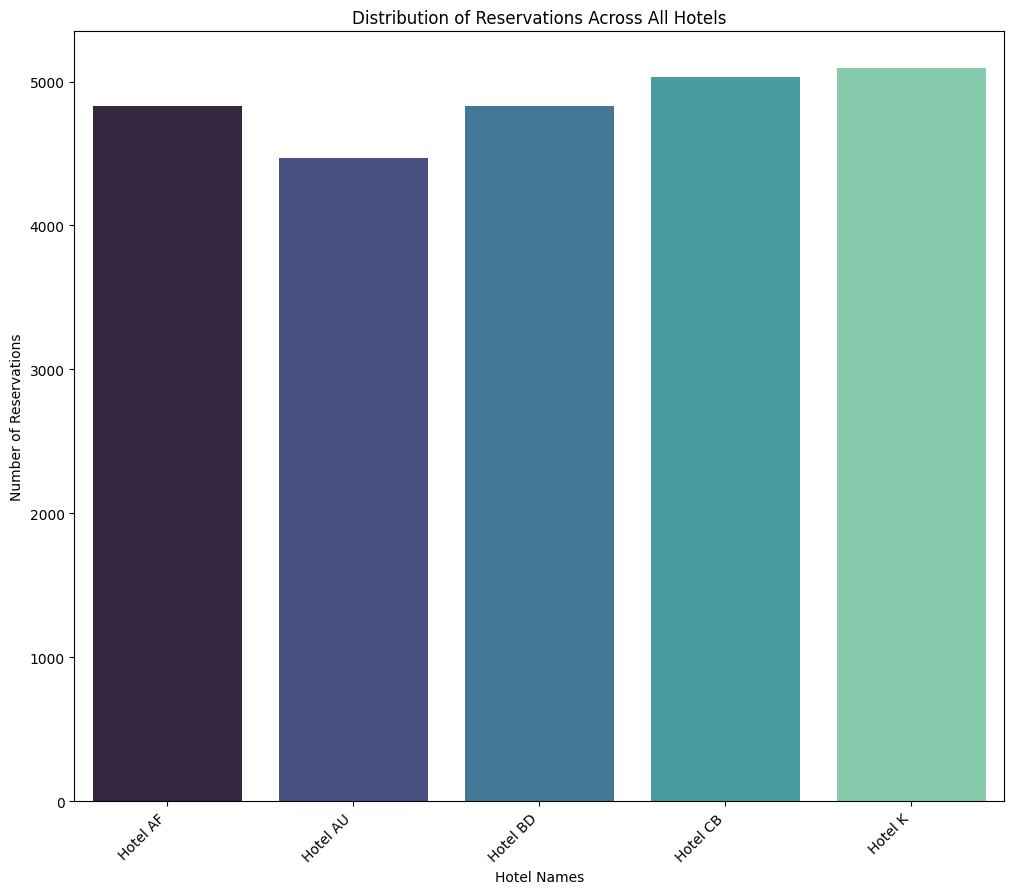

In [66]:
all_reservations = most_hotels_res_each_place.groupby('hotel_name').sum().reset_index()

# Create a bar plot for all reservations
plt.figure(figsize=(12, 10))
sns.barplot(x='hotel_name', y='place', data=all_reservations, palette="mako")
plt.title('Distribution of Reservations Across All Hotels')
plt.xlabel('Hotel Names')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# top five places customers spend time
top_places_spend_time = df.groupby(['place']).count()['days'].nlargest(5)
print(f'top five places customers spend time: \n{top_places_spend_time}')

top five places customers spend time: 
place
Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Name: days, dtype: int64


<ipython-input-69-15b52a475c10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_places_spend_time.values, y=top_places_spend_time.index, palette="muted")


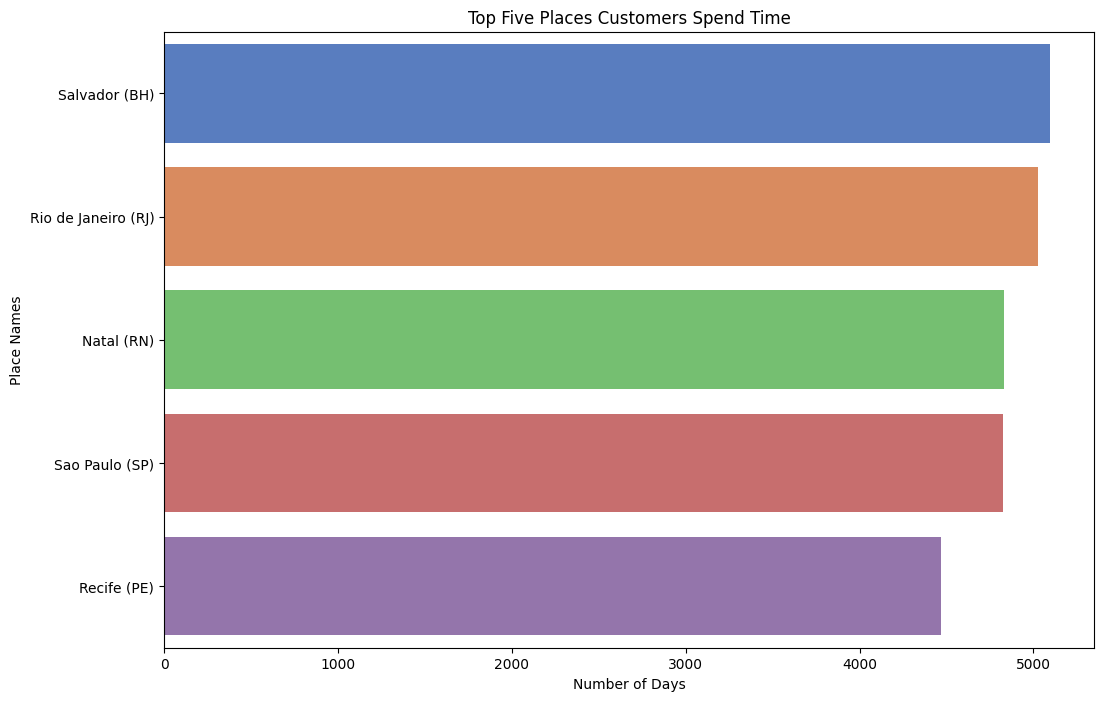

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_places_spend_time.values, y=top_places_spend_time.index, palette="muted")
plt.title('Top Five Places Customers Spend Time')
plt.xlabel('Number of Days')
plt.ylabel('Place Names')
plt.show()

In [25]:
# prices for every places descending
prices_for_every_places= df.groupby(['place']).count().sort_values('price', ascending=False)['price']
print(f'Prices for every places descending: \n{prices_for_every_places}')

Prices for every places descending: 
place
Salvador (BH)          5094
Rio de Janeiro (RJ)    5029
Natal (RN)             4829
Sao Paulo (SP)         4828
Recife (PE)            4467
Brasilia (DF)          4437
Campo Grande (MS)      4333
Aracaju (SE)           4205
Florianopolis (SC)     3330
Name: price, dtype: int64


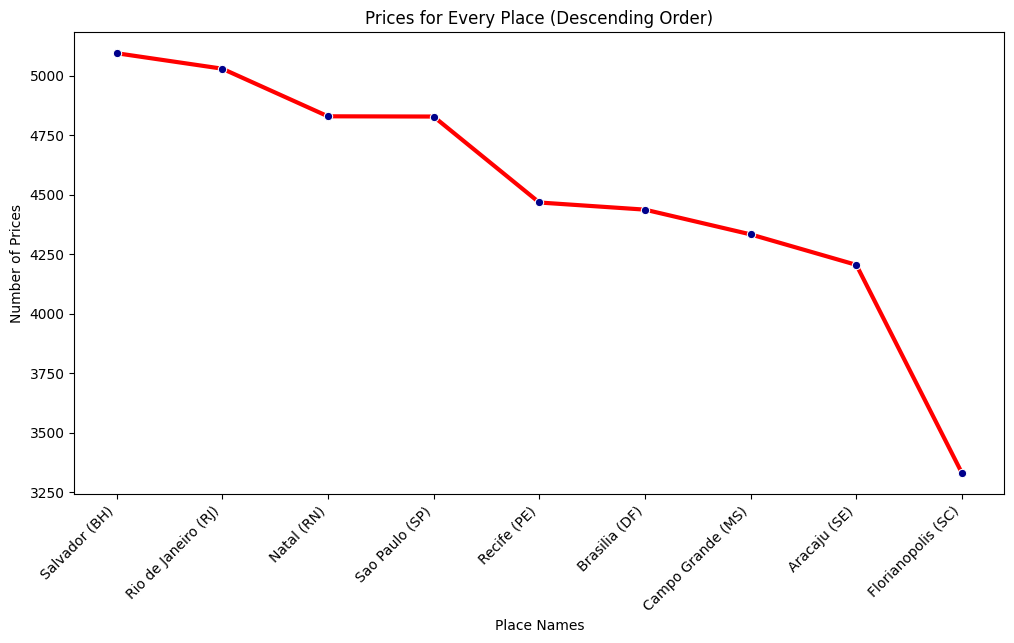

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=prices_for_every_places.index, y=prices_for_every_places.values, marker='o',markerfacecolor = 'darkblue', color='red',linewidth=3)
plt.title('Prices for Every Place (Descending Order)')
plt.xlabel('Place Names')
plt.ylabel('Number of Prices')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
#total price per year
total_price=df.groupby('year').sum()['total']
print(f'Total price per year: \n{total_price}')

Total price per year: 
year
2019    2858892.14
2020    9050897.48
2021    5999797.05
2022    3329396.78
2023     506195.76
Name: total, dtype: float64


<ipython-input-28-e17edbbb3636>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_price=df.groupby('year').sum()['total']


<ipython-input-82-99828f55464c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_price.index, y=total_price.values, palette="dark")


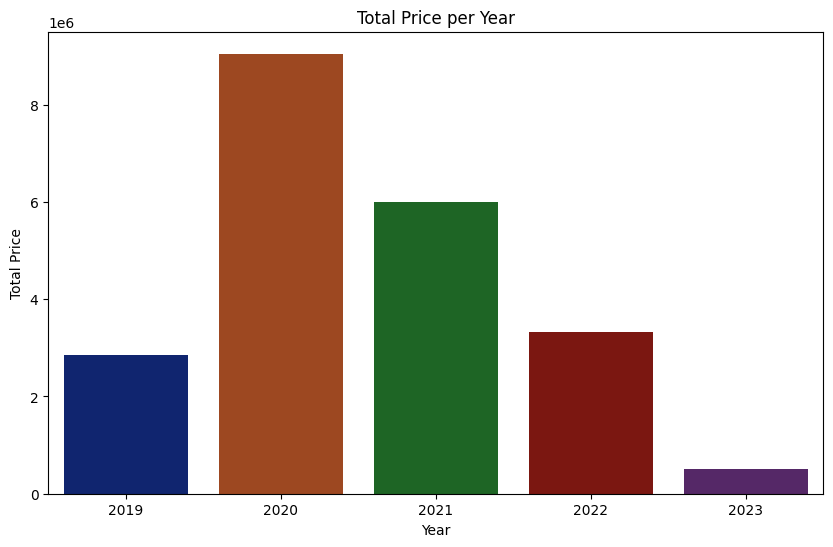

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_price.index, y=total_price.values, palette="dark")
plt.title('Total Price per Year')
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.show()